In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv('data.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.shape

(13611, 17)

In [4]:
df.size

231387

In [5]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [6]:
df.info()
#convert categorical to numerical features
#df = pd.get_dummies(df)
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
#Check for null values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
#Converting string column into numeric
# dictionary encoding
Class_dict={"DERMASON":0,"SIRA":1,"SEKER":2,"HOROZ":3,"CALI":4,"BARBUNYA":5,"BOMBAY":6}
df["Class_enc"]=df.Class.map(Class_dict)


In [9]:
df1=df.drop(["Class"],axis=1)


<AxesSubplot:>

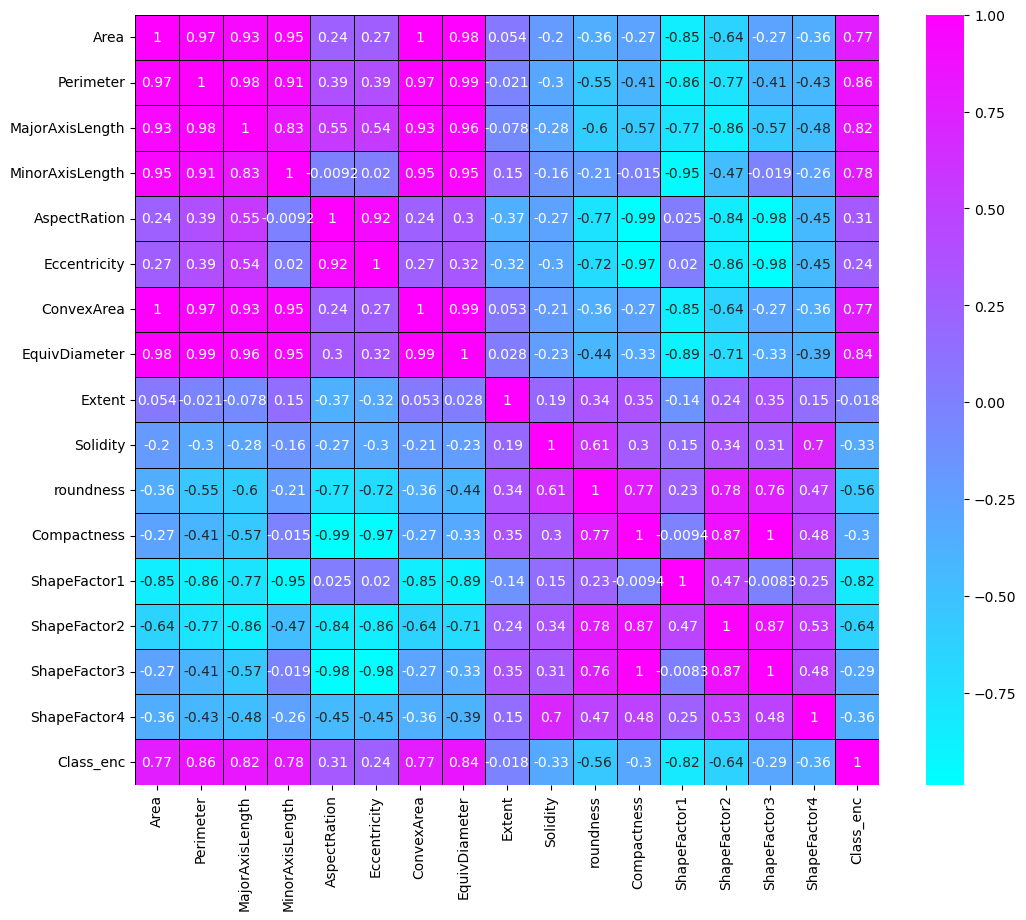

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True,cmap="cool",linewidths=0.7,linecolor="black")

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df1.iloc[:, :-1])
df1=pd.DataFrame(data_scaled,columns=df1.columns[:-1])
df1.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967316,0.884987,0.974979
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116


In [12]:
X=df1
y=df["Class_enc"]


In [13]:
print("X Shape: ",X.shape)
print("y Shape: ", y.shape)

X Shape:  (13611, 16)
y Shape:  (13611,)


In [14]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [16]:
#logistic regression
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
# divide data into training and testing set
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10888, 16)
(2723, 16)
(10888,)
(2723,)


In [18]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
#Accuracy On training set
print("Accuracy on training : ",lr.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",lr.score(X_test,y_test))

Accuracy on training :  0.9171565025716385
Accuracy on testing :  0.9203084832904884


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
y_pred=lr.predict(X_test)
print("confusion matrix:\n",
 confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred,average="micro"))
print("Precison: ",precision_score(y_test,y_pred,average="micro"))
print("F1-score: ", f1_score(y_test,y_pred,average="micro"))
print("Specifity: ",confusion_matrix(y_test, y_pred)[0,0] / (confusion_matrix(y_test,y_pred)[0,0]))

confusion matrix:
 [[602  58  11   0   0   0   0]
 [ 41 479   8   7   0   1   0]
 [ 13  10 385   0   0   5   0]
 [  4   8   0 391   5   0   0]
 [  0   5   0   4 299   9   0]
 [  0  10   2   1  15 233   0]
 [  0   0   0   0   0   0 117]]


Accuracy score: 0.9203084832904884
recall:  0.9203084832904884
Precison:  0.9203084832904884


NameError: name 'f1_score' is not defined

In [29]:
#Decision Tree

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [30]:
#Accuracy On training set
print("Accuracy on training : ",dt.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",dt.score(X_test,y_test))


Accuracy on training :  1.0
Accuracy on testing :  0.8898273962541314


In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
y_pred=lr.predict(X_test)
print("confusion matrix:\n",
 confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score:" ,accuracy_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred,average="micro"))
print("Precison: ",precision_score(y_test,y_pred,average="micro"))

confusion matrix:
 [[602  58  11   0   0   0   0]
 [ 41 479   8   7   0   1   0]
 [ 13  10 385   0   0   5   0]
 [  4   8   0 391   5   0   0]
 [  0   5   0   4 299   9   0]
 [  0  10   2   1  15 233   0]
 [  0   0   0   0   0   0 117]]


Accuracy score: 0.9203084832904884
recall:  0.9203084832904884
Precison:  0.9203084832904884


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [34]:
#Accuracy On training set
print("Accuracy on training : ",rf.score(X_train,y_train))
#Accuracy On testing set
print("Accuracy on testing : ",rf.score(X_test,y_test))

Accuracy on training :  1.0
Accuracy on testing :  0.9247153874403232


In [35]:
df_new = pd.get_dummies(df['Class'])
df_new

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
13606,0,0,0,1,0,0,0
13607,0,0,0,1,0,0,0
13608,0,0,0,1,0,0,0
13609,0,0,0,1,0,0,0


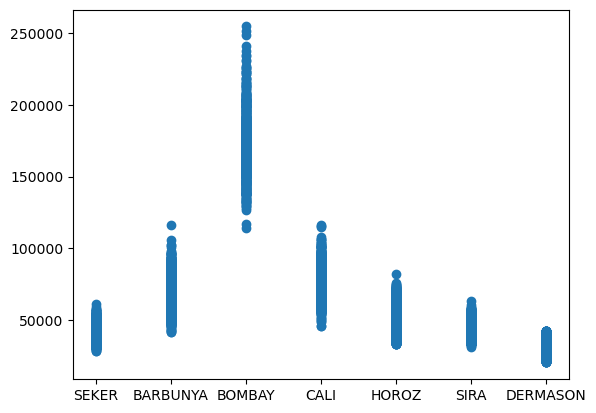

In [36]:
plt.scatter(df['Class'],df['Area'])
plt.show()

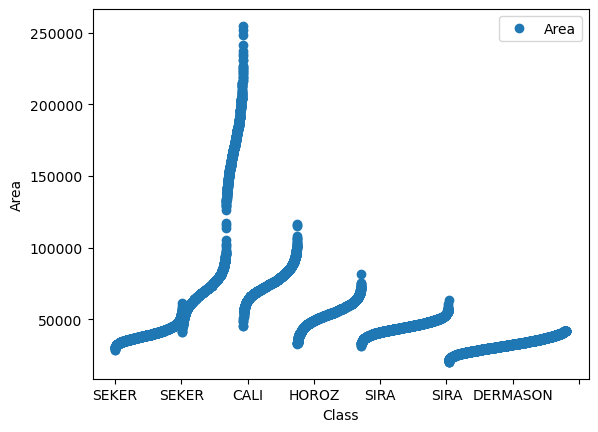

In [37]:
df.plot(x = 'Class',y = 'Area',style = 'o')
plt.xlabel('Class')
plt.ylabel('Area')
plt.show()